**Khyati Naik**

**Story 2**

**Data 608**

**Fall 2023**

In [29]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the FRED API endpoint URL
api_url = "https://api.stlouisfed.org/fred/series/observations"

# Define your FRED API key (you need to sign up on the FRED website to get an API key)
api_key = "adbe01232300174baed574620e8f4009"

# Define parameters for the API request
params = {
    "series_id": "FEDFUNDS",          # Series ID for Federal Funds Rate
    "api_key": api_key,               # Your FRED API key
    "file_type": "json",              # Response format (JSON)
    "observation_start": "1990-01-01",  # Start date (January 1990)
}

# Make an HTTP GET request to the FRED API
response = requests.get(api_url, params=params)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Extract the data series into a DataFrame
    df_fedfunds = pd.DataFrame(data["observations"])

    # Convert the date column to datetime format
    df_fedfunds['DATE'] = pd.to_datetime(df_fedfunds['date'])

    # Select only the relevant columns
    df_fedfunds = df_fedfunds[["DATE", "value"]]

    # Rename 'value' column to 'FEDFUNDS' in df_fedfunds
    df_fedfunds.rename(columns={'value': 'FEDFUNDS'}, inplace=True)

else:
    print("Failed to fetch data. HTTP status code:", response.status_code)

# Extract 'yr' and 'mo' from the 'DATE' column
df_fedfunds['yr'] = pd.to_datetime(df_fedfunds['DATE']).dt.year
df_fedfunds['mo'] = pd.to_datetime(df_fedfunds['DATE']).dt.month

# Convert 'yr' and 'mo' columns in df_fedfunds to integers
df_fedfunds['yr'] = df_fedfunds['yr'].astype(int)
df_fedfunds['mo'] = df_fedfunds['mo'].astype(int)

# Drop the 'DATE' column
df_fedfunds.drop(columns=['DATE'], inplace=True)

df_fedfunds['FEDFUNDS'] = pd.to_numeric(df_fedfunds['FEDFUNDS'], errors='coerce')

# Print the DataFrame
print(df_fedfunds)
print(df_fedfunds.dtypes)


     FEDFUNDS    yr  mo
0        8.23  1990   1
1        8.24  1990   2
2        8.28  1990   3
3        8.26  1990   4
4        8.18  1990   5
..        ...   ...  ..
399      4.83  2023   4
400      5.06  2023   5
401      5.08  2023   6
402      5.12  2023   7
403      5.33  2023   8

[404 rows x 3 columns]
FEDFUNDS    float64
yr            int64
mo            int64
dtype: object


In [30]:
# Define a dictionary to map month names to integers
month_to_int = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Define the URL of the CSV file on GitHub
url_gh = "https://raw.githubusercontent.com/Naik-Khyati/608/main/story2/data/"

# Read the CSV file into a DataFrame
df = pd.read_csv(url_gh+"cpi.csv")

# Reshape the data into a long format
df_cpi = pd.melt(df, id_vars=["Year"], var_name="mo", value_name="cpi")

# Rename columns
df_cpi.columns = ["yr", "mo", "cpi"]

df_cpi['mo'] = df_cpi['mo'].map(month_to_int)

# Remove rows with NaN values in the 'cpi' column
df_cpi = df_cpi.dropna(subset=["cpi"])

# Sort the DataFrame by 'yr' and 'mo'
df_cpi = df_cpi.sort_values(by=["yr", "mo"])

# Display the resulting DataFrame
print(df_cpi)

       yr  mo      cpi
0    1990   1  127.400
34   1990   2  128.000
68   1990   3  128.700
102  1990   4  128.900
136  1990   5  129.200
..    ...  ..      ...
101  2023   3  301.836
135  2023   4  303.363
169  2023   5  304.127
203  2023   6  305.109
237  2023   7  305.691

[403 rows x 3 columns]


In [31]:
# Read the CSV file into a DataFrame
df = pd.read_csv(url_gh+"unemp.csv")

# Reshape the data into a long format
df_unemp = pd.melt(df, id_vars=["Year"], var_name="mo", value_name="unemployment_rate")

# Rename columns
df_unemp.columns = ["yr", "mo", "unemployment_rate"]

# Sort the DataFrame by 'yr' and 'mo'
df_unemp = df_unemp.sort_values(by=["yr", "mo"])

# Remove rows with NaN values in the 'unemployment_rate' column
df_unemp = df_unemp.dropna(subset=["unemployment_rate"])

# Convert the 'mo' column in df_unemp and df_cpi to integers using the mapping
df_unemp['mo'] = df_unemp['mo'].map(month_to_int)

# Display the resulting DataFrame
print(df_unemp)



       yr  mo  unemployment_rate
102  1990   4                5.4
238  1990   8                5.7
374  1990  12                6.3
34   1990   2                5.3
0    1990   1                5.4
..    ...  ..                ...
33   2023   1                3.4
237  2023   7                3.5
203  2023   6                3.6
101  2023   3                3.5
169  2023   5                3.7

[404 rows x 3 columns]


In [32]:
# Merge df_fedfunds, df_unemp, and df_cpi based on 'yr' and 'mo' columns
merged_df = df_fedfunds.merge(df_unemp, on=['yr', 'mo'], how='inner')
merged_df = merged_df.merge(df_cpi, on=['yr', 'mo'], how='inner')

# Rearrange the columns in the merged DataFrame
merged_df = merged_df[['yr', 'mo', 'FEDFUNDS', 'cpi', 'unemployment_rate']]

# Combine 'yr' and 'mo' columns to create a 'yr_mo' column
merged_df['yr_mo'] = merged_df['yr'].astype(str) + '-' + merged_df['mo'].astype(str)

# Convert the 'yr_mo' column to a datetime format for proper sorting
merged_df['yr_mo'] = pd.to_datetime(merged_df['yr_mo'], format='%Y-%m')

# Calculate month-over-month change in CPI and create a new column
merged_df['cpi_change'] = merged_df['cpi'].diff()

# Calculate and Plot YoY CPI Change
merged_df['cpi_yoy_change'] = merged_df['cpi'].pct_change(12) * 100


print(merged_df)
print(merged_df.dtypes)

       yr  mo  FEDFUNDS      cpi  unemployment_rate      yr_mo  cpi_change  \
0    1990   1      8.23  127.400                5.4 1990-01-01         NaN   
1    1990   2      8.24  128.000                5.3 1990-02-01       0.600   
2    1990   3      8.28  128.700                5.2 1990-03-01       0.700   
3    1990   4      8.26  128.900                5.4 1990-04-01       0.200   
4    1990   5      8.18  129.200                5.4 1990-05-01       0.300   
..    ...  ..       ...      ...                ...        ...         ...   
398  2023   3      4.65  301.836                3.5 2023-03-01       0.996   
399  2023   4      4.83  303.363                3.4 2023-04-01       1.527   
400  2023   5      5.06  304.127                3.7 2023-05-01       0.764   
401  2023   6      5.08  305.109                3.6 2023-06-01       0.982   
402  2023   7      5.12  305.691                3.5 2023-07-01       0.582   

     cpi_yoy_change  
0               NaN  
1               NaN

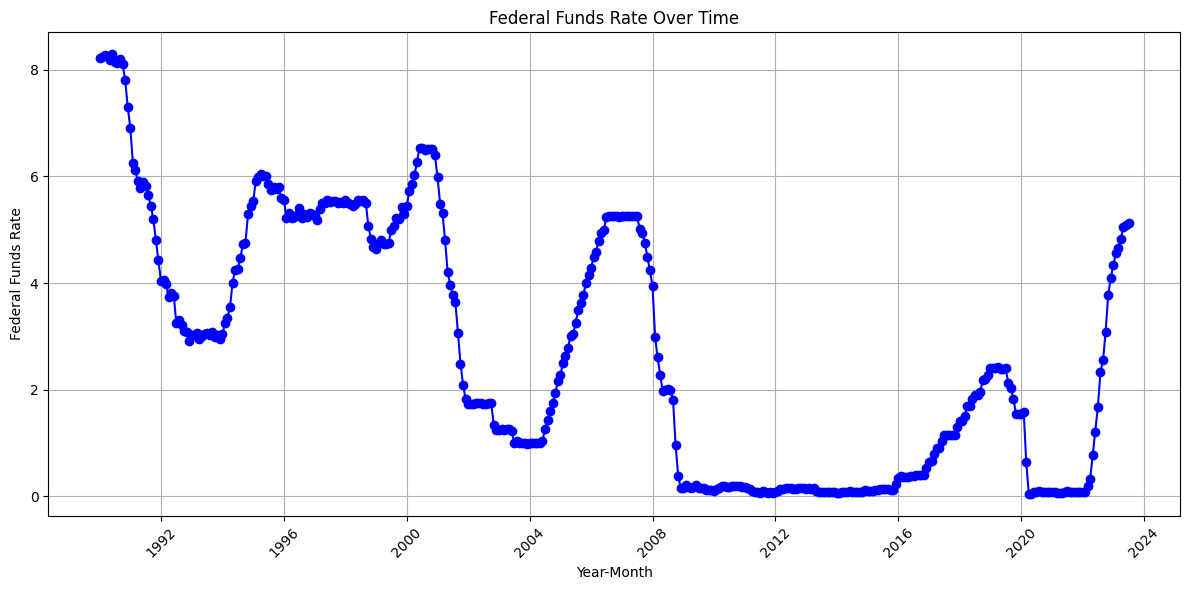

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['yr_mo'], merged_df['FEDFUNDS'], marker='o', linestyle='-', color='blue')
plt.title('Federal Funds Rate Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Federal Funds Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


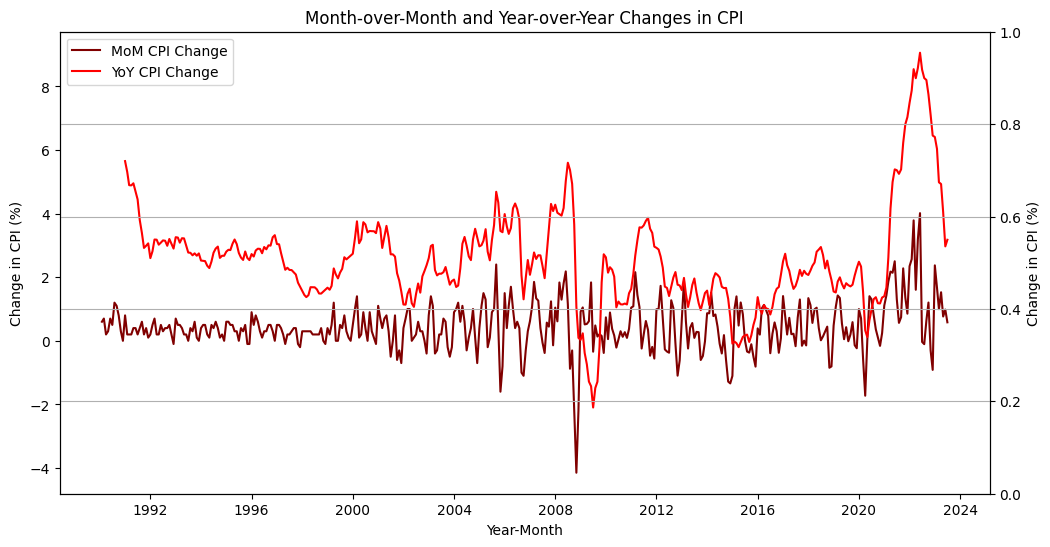

In [34]:
# Plot the CPI Change (Month-over-Month) and YoY Change
plt.figure(figsize=(12, 6))

# Plot MoM CPI Change
plt.plot(merged_df['yr_mo'], merged_df['cpi_change'], label='MoM CPI Change', color='maroon')

# Calculate and Plot YoY CPI Change
plt.plot(merged_df['yr_mo'], merged_df['cpi_yoy_change'], label='YoY CPI Change', color='red')

plt.xlabel('Year-Month')
plt.ylabel('Change in CPI (%)')
plt.title('Month-over-Month and Year-over-Year Changes in CPI')
plt.legend(loc='upper left')

# Create a second y-axis on the right side
plt.twinx()
plt.ylabel('Change in CPI (%)')

# Add grid lines for both y-axes
plt.grid(True)

plt.show()


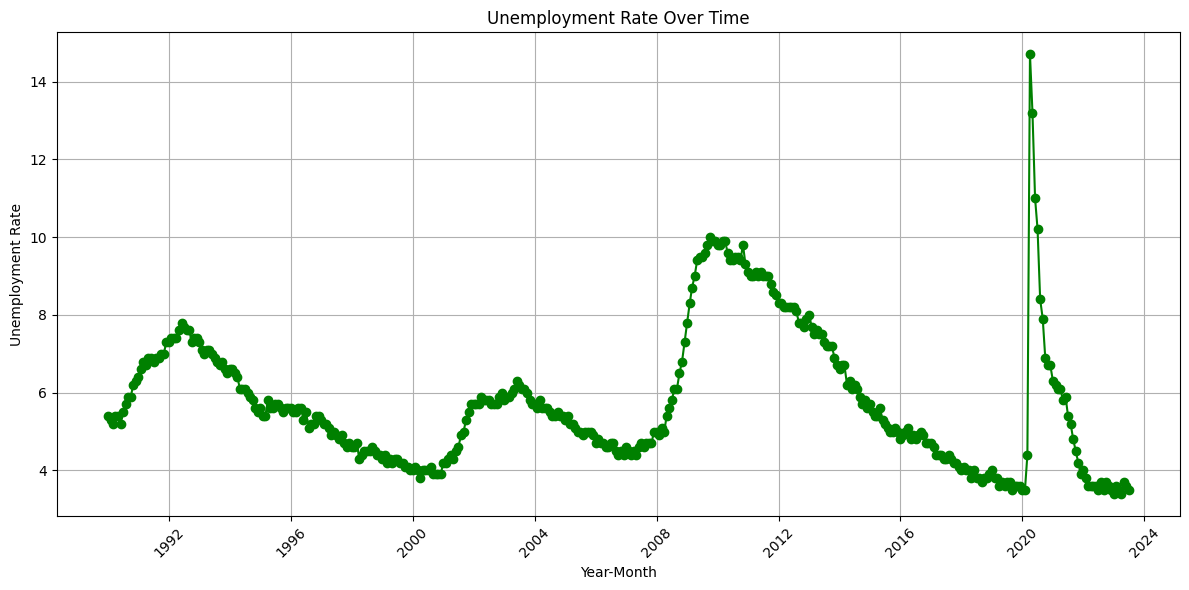

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['yr_mo'], merged_df['unemployment_rate'], marker='o', linestyle='-', color='green')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


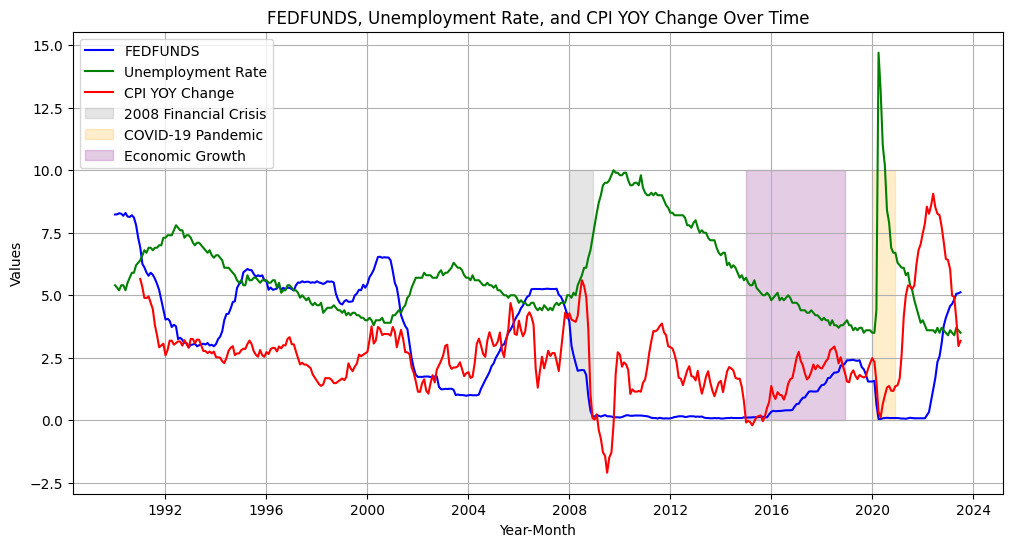

In [36]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
plt.plot(merged_df['yr_mo'], merged_df['FEDFUNDS'], label='FEDFUNDS', color='blue')
plt.plot(merged_df['yr_mo'], merged_df['unemployment_rate'], label='Unemployment Rate', color='green')
plt.plot(merged_df['yr_mo'], merged_df['cpi_yoy_change'], label='CPI YOY Change', color='red')

# Highlight areas of interest
# 1. Interest Rate Cuts During Economic Crises (2008 Financial Crisis)
ax.fill_between(merged_df['yr_mo'], 0, 10, where=(merged_df['yr'] == 2008), alpha=0.2, color='gray', label='2008 Financial Crisis')
# 2. Response to COVID-19 Pandemic
ax.fill_between(merged_df['yr_mo'], 0, 10, where=(merged_df['yr'] == 2020), alpha=0.2, color='orange', label='COVID-19 Pandemic')
# 3. Gradual Rate Increases During Economic Growth (2015-2018)
ax.fill_between(merged_df['yr_mo'], 0, 10, where=((merged_df['yr'] >= 2015) & (merged_df['yr'] <= 2018)), alpha=0.2, color='purple', label='Economic Growth')

# Set labels and title
plt.xlabel('Year-Month')
plt.ylabel('Values')
plt.title('FEDFUNDS, Unemployment Rate, and CPI YOY Change Over Time')
plt.legend()
plt.grid(True)

# Add comments on the chart
plt.annotate('Interest Rate Cuts during Crisis', xy=(2008.5, 5), fontsize=10, color='black')
plt.annotate('Fed Response to COVID-19', xy=(2020.5, 6), fontsize=10, color='black')
plt.annotate('Gradual Rate Increases During Growth', xy=(2016, 8.5), fontsize=10, color='black')

# Show the plot
plt.show()
